<a href="https://colab.research.google.com/github/NguyenTruongV/data_analysis_deep-learning/blob/main/Bai_4.2/Titanic_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("titanic_disaster.csv")


In [3]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

def age_group(age):
    if age <= 12:
        return "Kid"
    elif age <= 18:
        return "Teen"
    elif age <= 60:
        return "Adult"
    else:
        return "Older"

df['Agegroup'] = df['Age'].apply(age_group)


In [5]:
df['familySize'] = 1 + df['SibSp'] + df['Parch']


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Agegroup',
       'familySize'],
      dtype='object')

Trực quan tỉ lệ sống sót và thiệt mạng theo giới tính

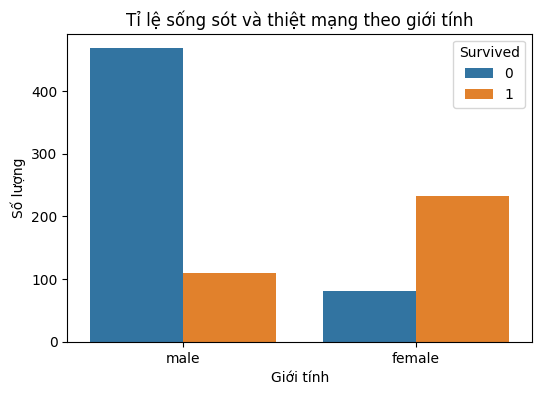

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')

plt.title("Tỉ lệ sống sót và thiệt mạng theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")

plt.show()


Sống sót theo Pclass

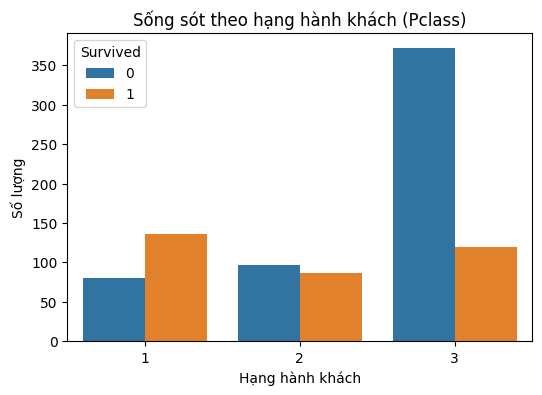

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived')

plt.title("Sống sót theo hạng hành khách (Pclass)")
plt.xlabel("Hạng hành khách")
plt.ylabel("Số lượng")

plt.show()


Sống sót theo giới tính và Agegroup

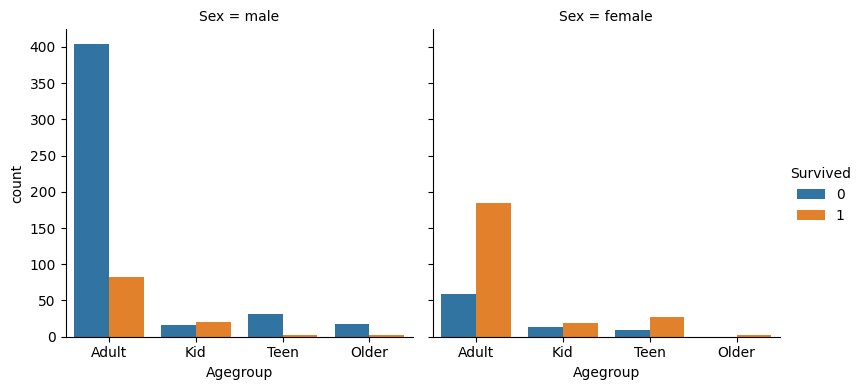

In [10]:
sns.catplot(
    data=df,
    x='Agegroup',
    hue='Survived',
    col='Sex',
    kind='count',
    height=4
)

plt.show()


Xác suất sống sót theo familySize

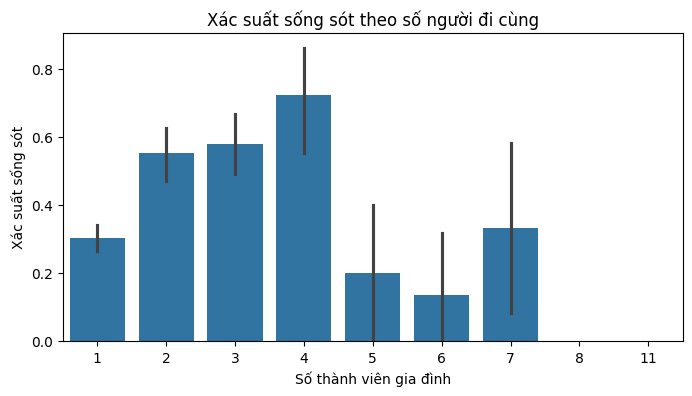

In [11]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='familySize', y='Survived')

plt.title("Xác suất sống sót theo số người đi cùng")
plt.xlabel("Số thành viên gia đình")
plt.ylabel("Xác suất sống sót")

plt.show()


Xác suất sống sót theo Fare

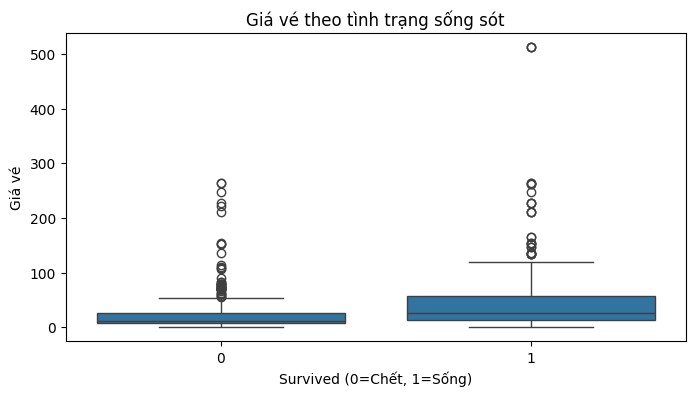

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Survived', y='Fare')

plt.title("Giá vé theo tình trạng sống sót")
plt.xlabel("Survived (0=Chết, 1=Sống)")
plt.ylabel("Giá vé")

plt.show()


Sống sót theo Pclass và Embarked

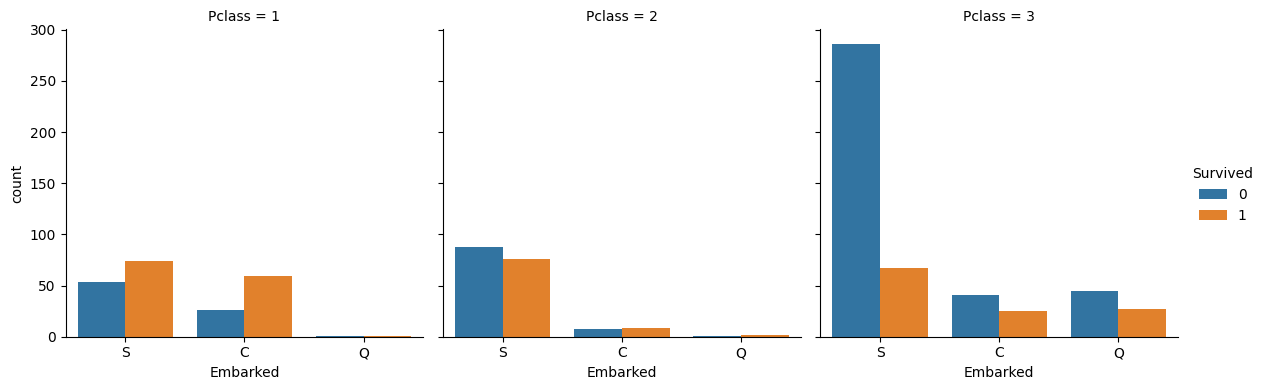

In [13]:
sns.catplot(
    data=df,
    x='Embarked',
    hue='Survived',
    col='Pclass',
    kind='count',
    height=4
)

plt.show()
